This notebooks generates the figures of the experimental section of our reproducibility report.

First, let's import all the necesssary libraries and define the `nested_dict`, which is the type for storing and loading our results.

In [1]:
import pickle
import collections
import numpy as np
from matplotlib import pyplot as plt

def nested_dict():
    return collections.defaultdict(nested_dict)

Now we load and plot the results for the experiment of the Section 5.1.1. To reproduce our experiments, run the `different-attacks.ipynb` under the `experiments` folder.

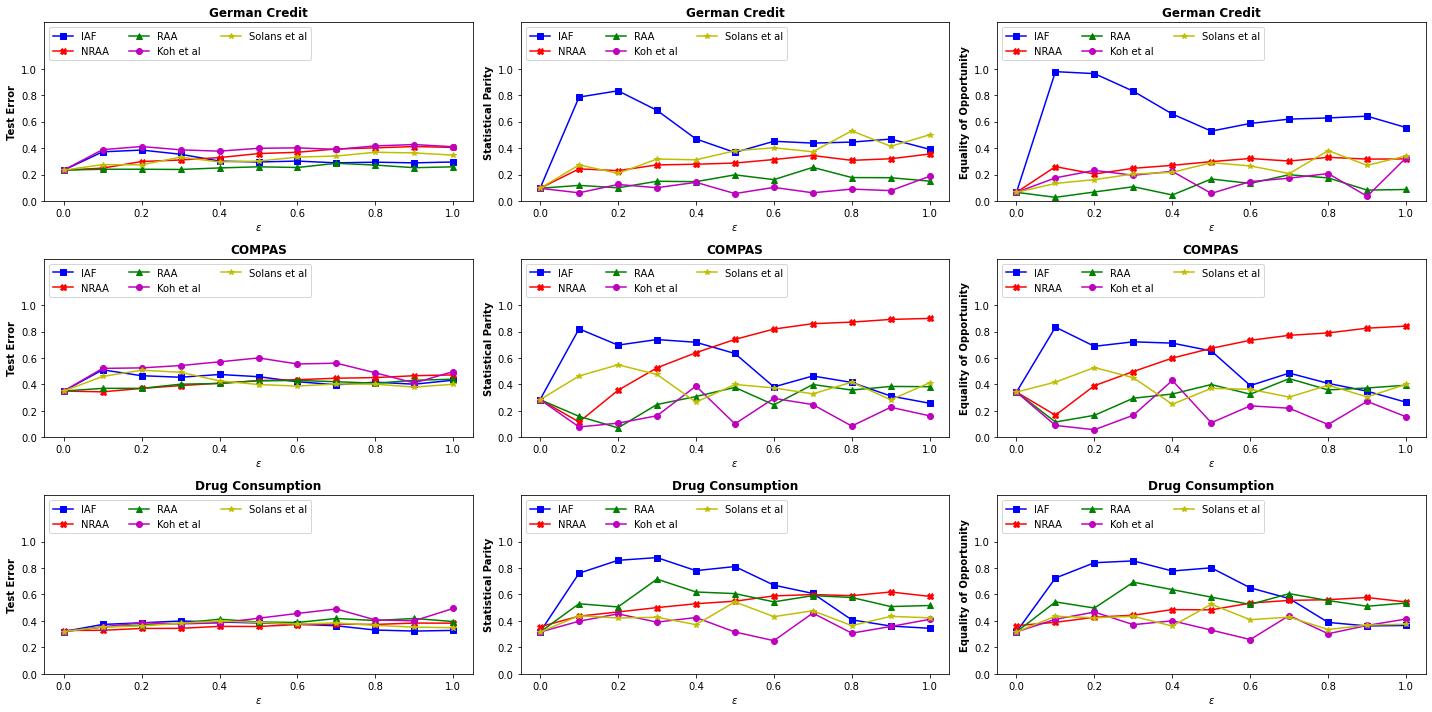

In [2]:
with open('different_attacks.pkl', 'rb') as f:
    results = pickle.load(f)
    
colors, markers = ['b', 'r', 'g', 'm', 'y'], ['s', 'X', '^', 'o', '*']

fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for i, dataset in enumerate(['German Credit', 'COMPAS', 'Drug Consumption']):
    for j, metric in enumerate(['Test Error', 'Statistical Parity', 'Equality of Opportunity']):
        for k, method in enumerate(['IAF', 'NRAA', 'RAA', 'Koh et al', 'Solans et al']):
            eps = np.array(list(results[dataset][metric][method]['mean'].keys()))
            mean = np.array(list(results[dataset][metric][method]['mean'].values()))
            std = np.array(list(results[dataset][metric][method]['std'].values()))
            
            ax[i, j].plot(eps, mean, c=colors[k], marker=markers[k], label=method)
        
        ax[i, j].set_xlabel('$\epsilon$', fontweight='bold')
        ax[i, j].set_ylabel(metric, fontweight='bold')
        ax[i, j].set_title(dataset, fontweight='bold')
        ax[i, j].legend(loc='upper left', ncol=3)
        ax[i, j].set_ylim([0, 1.35])
        ax[i, j].set_yticks(np.arange(0, 1.1, 0.2))
        
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.tight_layout()
plt.show()

Now we load and plot the results for the experiment of the Section 5.1.2. To reproduce our experiments, run the `different-lambda.ipynb` under the `experiments` folder.

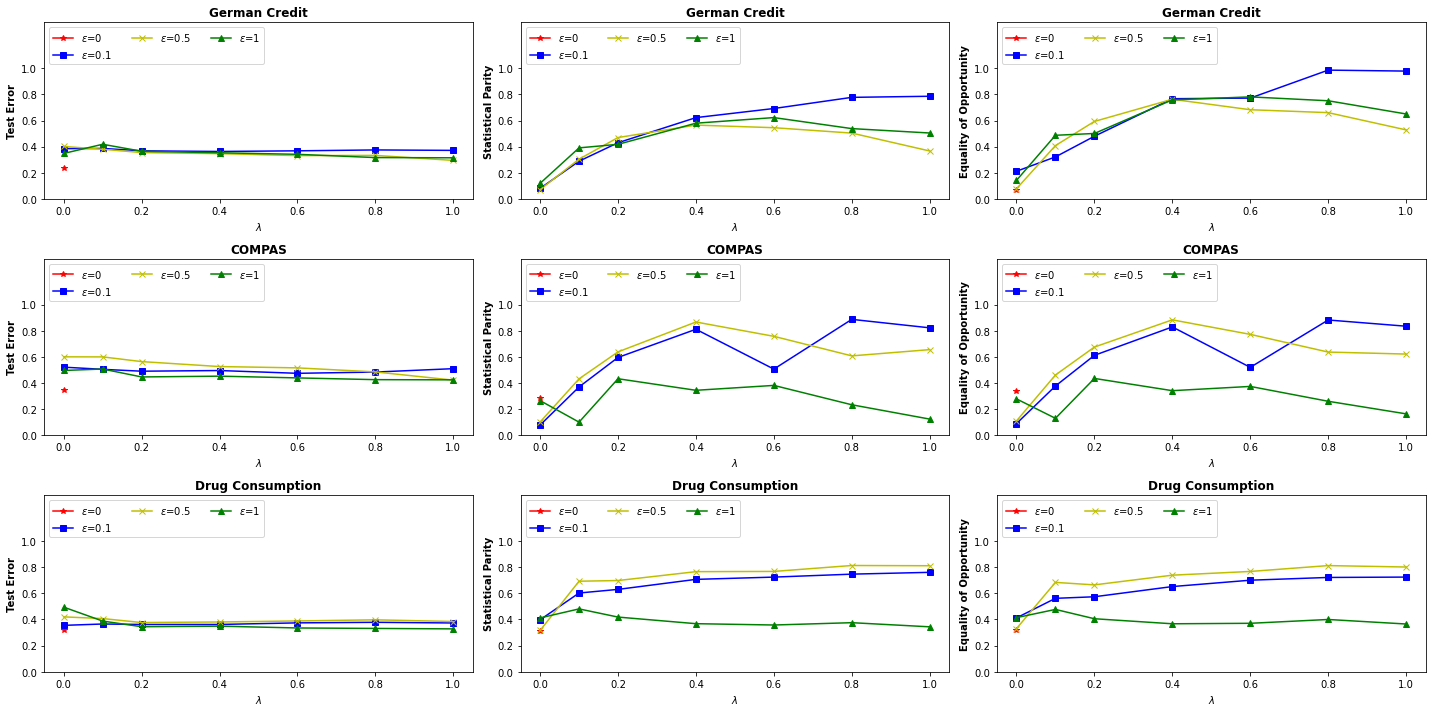

In [3]:
with open('different_lambda.pkl', 'rb') as f:
    results = pickle.load(f)

colors, markers = ['r', 'b', 'y', 'g'], ['*', 's', 'x', '^']

fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for i, dataset in enumerate(['German Credit', 'COMPAS', 'Drug Consumption']):
    for j, metric in enumerate(['Test Error', 'Statistical Parity', 'Equality of Opportunity']):
        for k, eps in enumerate([0, 0.1, 0.5, 1]):
            lamda = np.array(list(results[dataset][metric][eps]['mean'].keys()))
            mean = np.array(list(results[dataset][metric][eps]['mean'].values()))
            std = np.array(list(results[dataset][metric][eps]['std'].values()))
            
            ax[i, j].plot(lamda, mean, c=colors[k], marker=markers[k], label='$\epsilon$' + f'={eps}')
        
        ax[i, j].set_xlabel('$\lambda$', fontweight='bold')
        ax[i, j].set_ylabel(metric, fontweight='bold')
        ax[i, j].set_title(dataset, fontweight='bold')
        ax[i, j].legend(loc='upper left', ncol=3)
        ax[i, j].set_ylim(0, 1.35)
        ax[i, j].set_yticks(np.arange(0, 1.1, 0.2))
        
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.tight_layout()
plt.show()

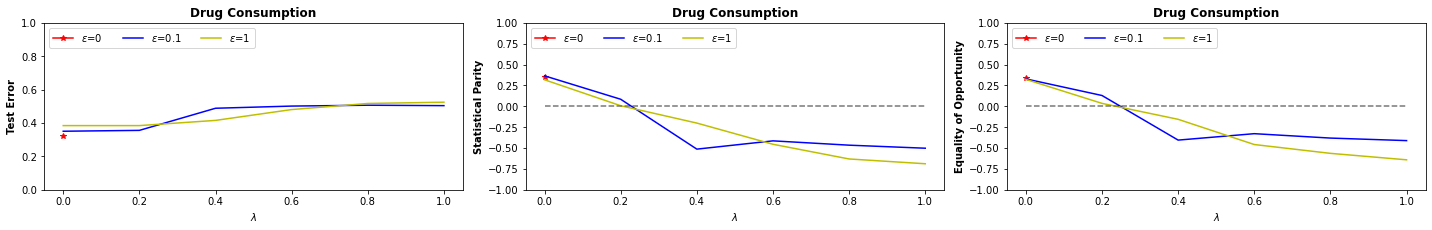

In [4]:
with open('augmentation.pkl', 'rb') as f:
    results = pickle.load(f)
    
colors, markers = ['r', 'b', 'y', 'g'], ['*', None, None, None]

fig, ax = plt.subplots(1, 3, figsize=(20, 3.3))
dataset = 'Drug Consumption'
for j, metric in enumerate(['Test Error', 'Statistical Parity', 'Equality of Opportunity']):
    for k, eps in enumerate([0, 0.1, 1]):
        lamda = np.array(list(results[dataset][metric][eps]['mean'].keys()))
        mean = np.array(list(results[dataset][metric][eps]['mean'].values()))
        std = np.array(list(results[dataset][metric][eps]['std'].values()))

        ax[j].plot(lamda, mean, marker=markers[k], c=colors[k], label='$\epsilon$' + f'={eps}')
        if metric != 'Test Error' and eps>0:
            ax[j].plot(lamda, np.array([0]*len(lamda)), 'k--', alpha=0.3)

    ax[j].set_xlabel('$\lambda$', fontweight='bold')
    ax[j].set_ylabel(metric, fontweight='bold')
    ax[j].set_title(dataset, fontweight='bold')
    ax[j].legend(loc='upper left', ncol=3)
    if metric != 'Test Error':
        ax[j].set_ylim(-1, 1)
    else: 
        ax[j].set_ylim(0, 1)

        
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.tight_layout()
plt.show()